Topic 3.5  |  换个视角看色谱
# 可视化色谱亮度
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
# 导入包
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import rgb_to_hsv

In [2]:
# 安装包
! pip install colorspacious

In [3]:
from colorspacious import cspace_converter

In [4]:
# 选定色谱，定义 list
cm_list = ['RdYlBu', 'viridis', 'Blues', 'cool', 'rainbow', 'jet', 'turbo', 'hsv']

### 可视化亮度

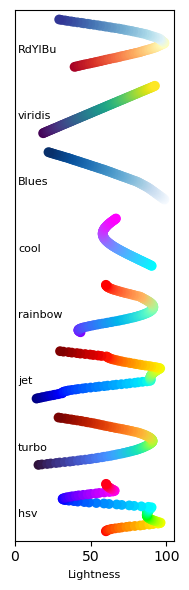

In [8]:
y = np.linspace(0.0, 1.0, 100)

fig, ax = plt.subplots(figsize = (2, 6))

for idx, cm_idx in enumerate(cm_list[::-1]):

    rgb = mpl.colormaps[cm_idx](y)[np.newaxis, :, :3]
    lab = cspace_converter("sRGB1", "CAM02-UCS")(rgb)
    # 将 RGB 色号转换为 CAM02-UCS
    # CAM02-UCS 有六个维度：
    # brightness (luminance), lightness, colorfulness, chroma, saturation, and hue.
    # 参考：
    # https://colorspacious.readthedocs.io/en/latest/reference.html
    x_ = lab[0, :, 0]
    # 提取色谱亮度值
    
    # 用散点可视化色谱
    # 横轴为亮度
    # 纵轴为等差数列，用来展开色谱散点

    ax.scatter(x_, y + idx * 1.4, c=rgb[0], s=50, linewidths=0.0)
    
    # 文字注释
    ax.text(2, idx * 1.4 + 0.3, cm_idx, fontsize=8)

ax.set_ylim((-0.2, 11))
ax.set_yticks([])
ax.set_xlim((0, 105))
ax.set_xlabel('Lightness', fontsize=8)
fig.tight_layout(h_pad=0.1)
fig.savefig('Figures/选定色谱的亮度.svg', format='svg')

In [ ]:
# Repo: https://github.com/Visualize-ML
# Book 2 Beauty of Visualization  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023